In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x1_label1=np.random.normal(3,1,1000)
x2_label1=np.random.normal(2,1,1000)
x1_label2=np.random.normal(7,1,1000)
x2_label2=np.random.normal(6,1,1000)

x1_xs=np.append(x1_label1,x1_label2)
x2_xs=np.append(x2_label1,x2_label2)

ys=np.asarray([0.]*len(x1_label1)+[1.]*len(x1_label2))

learning_rate=0.01
training_epoch=2000

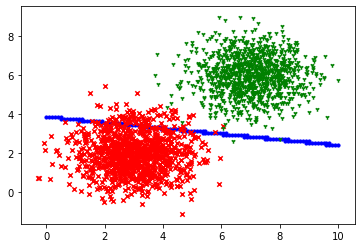

In [28]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

X1=tf.placeholder(tf.float32,shape=(None,),name="x1")
X2=tf.placeholder(tf.float32,shape=(None,),name="x2")
Y=tf.placeholder(tf.float32,shape=(None,),name="y")

w=tf.Variable([0.,0.,0.],name="parameters",trainable=True)

y_model=tf.sigmoid(w[2]*X2+w[1]*X1+w[0])

cost=tf.reduce_mean(-Y*tf.log(y_model)-(1-Y)*tf.log(1-y_model))

train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess=tf.Session()
init=tf.global_variables_initializer()
prev_err=0
sess.run(init)


for epoch in range(training_epoch):
    err,_=sess.run([train_op,cost],{X1:x1_xs,X2:x2_xs,Y:ys})
    #if(abs(0-err))<0.0001:
     #   break

w_val=sess.run(w,{X1:x1_xs,X2:x2_xs,Y:ys})

x1_boundry,x2_boundry=[],[]

for x1_test in np.linspace(0,10,100):
    for x2_test in np.linspace(0,10,100):
        z=sigmoid(-x2_test*w_val[2]-x1_test*w_val[1]-w_val[0])
        
        if abs(z-0.5)<0.01:
            x1_boundry.append(x1_test)
            x2_boundry.append(x2_test)    

plt.scatter(x1_boundry,x2_boundry,c='b',marker='o',s=10)
plt.scatter(x1_label1,x2_label1,c='r',marker='x',s=20)
plt.scatter(x1_label2,x2_label2,c='g',marker='1',s=20)
plt.show()
